# Canada Refugee Statistics Exploratory Data Analysis

EXAMPLE TEST


In this project we perform Exploratory Data Analysis **(EDA)** on **UNHCR Refugee Statistics** for **Canada** from **2012-2022.**


_Original dataset can be downloaded from the [unhcr.org](https://www.unhcr.org/refugee-statistics/download/?url=8tIY7I) website._

## Questions

1. From which countries has Canada admitted the highest number of refugees?
2. What are the total number of resettled refugees in Canada per year?
3. What are the countries of origin for the majority of asylum claims made in Canada?
4. What is the total number of asylum claims made in Canada every year?
5. What are the general trends in refugee and asylum statistics from 2012-2022?

## Important Distinction: Refugees vs. Asylum Seekers

**The 1951 Refugee Convention defines a refugee as:** “A person who, owing to a well-founded fear of being persecuted for reasons of race, religion, nationality, membership of a particular social group or political opinion, is outside the country of his nationality and is unable or, owing to such fear, unwilling to avail himself of the protection of that country”.
> - In this data set, UNHCR-Refugees refers to people who have been resettled to Canada, and arrive to the country as permanent residents.
    
**An asylum seeker (or claimant) on the other hand is defined as** someone who is seeking international protection but has not yet been granted refugee status. 
> - In this data set, asylum-seeker refers to someone who has arrived in Canada as a visitor, worker, student, etc., through official or unofficial ports of entry, and who applied for protection from within Canada (after arrival). 

_For more information and definitions, visit the [unhcr.ca](https://www.unhcr.ca/about-us/frequently-asked-questions/#:~:text=An%20asylum%2Dseeker%20is%20someone,yet%20been%20granted%20refugee%20status.) website._

## Notebook Content

1. **Step 1:** Install + Import Necessary Libraries
2. **Step 2:** Reading, Exploring and Preparing Data
3. **Step 3:** Exploratory Data Analysis + Visualization
4. **2012- 2022 Canada Refugee Statistics EDA Results Summary**

## Step 1: Install + Import Necessary Libraries

In [190]:
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Step 2: Reading, Exploring and Preparing Data

In [2]:
data = pd.read_csv('can-stats-2012-22.csv')

In [3]:
data.head()

,Year,Country-of-origin,UNHCR-refugees,Asylum-seekers,total-count
0,2012,Afghanistan,2609,411,3020
1,2012,Albania,1764,579,2343
2,2012,Algeria,513,284,797
3,2012,Angola,753,21,774
4,2012,Antigua and Barbuda,40,30,70


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1870 entries, 0 to 1869
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Year               1870 non-null   int64 
 1   Country-of-origin  1870 non-null   object
 2   UNHCR-refugees     1870 non-null   int64 
 3   Asylum-seekers     1870 non-null   int64 
 4   total-count        1870 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 73.2+ KB


In [154]:
# Check missing values
pd.DataFrame(data.isnull().sum(), columns=['Missing Values'])

,Missing Values
Year,0
Country-of-origin,0
UNHCR-refugees,0
Asylum-seekers,0
total-count,0


## Step 3: Exploratory Data Analysis + Visualization

### Question 1: Countries From Which Canada Has Admitted Highest Number of Refugees

In [189]:
# Create a DataFrame with the top countries and their UNHCR-refugees sum, then sort values in desc order
top_unhcr_refugees = data.groupby('Country-of-origin')['UNHCR-refugees'].sum().reset_index(name='UNHCR-refugees').sort_values(by='UNHCR-refugees', ascending=False).head(10)

# Display the DataFrame with the top countries for UNHCR Refugees
top_unhcr_refugees.reset_index(drop=True).style.bar()

,Country-of-origin,UNHCR-refugees
0,Colombia,108416
1,China,98586
2,Ukraine,88376
3,Pakistan,74737
4,Haiti,70956
5,Sri Lanka,66343
6,Nigeria,60554
7,Mexico,51072
8,Türkiye,42533
9,Iran (Islamic Rep. of),40881


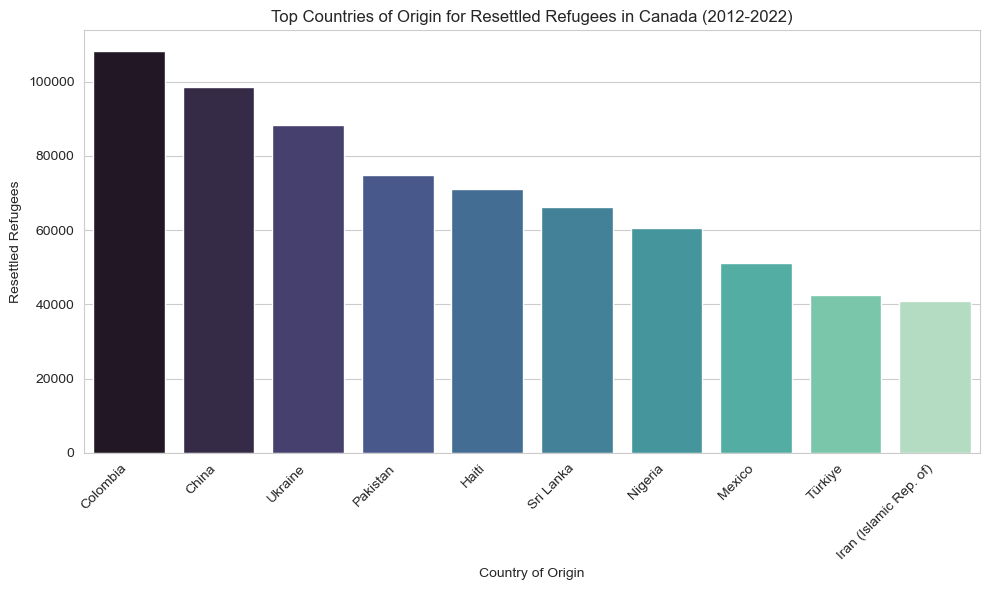

In [173]:
# Create Seaborn bar graph to visualize top 10 countries with highest number of refugees resettled in Canada
plt.figure(figsize=(10,6))
sns.barplot(data=top_unhcr_refugees, x='Country-of-origin', y='UNHCR-refugees', palette='mako')

# Add labels and titles
plt.xlabel('Country of Origin')
plt.ylabel('Resettd refugees')
plt.title('Top Countries of origin for Resettled Refugees in Canada (2012-2022)')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Display plot
plt.tight_layout()
plt.show()

### Question 2: Total Number of Resettled Refugees in Canada Per Year

In [179]:
total_refugees_yrly = data.groupby('Year')['UNHCR-refugees'].sum().reset_index(name='UNHCR-refugees').sort_values(by='Year')

total_refugees_yrly.reset_index(drop=True)

,Year,UNHCR-refugees
0,2012,163751
1,2013,160347
2,2014,149164
3,2015,135890
4,2016,97322
5,2017,104768
6,2018,114101
7,2019,101757
8,2020,109214
9,2021,130125


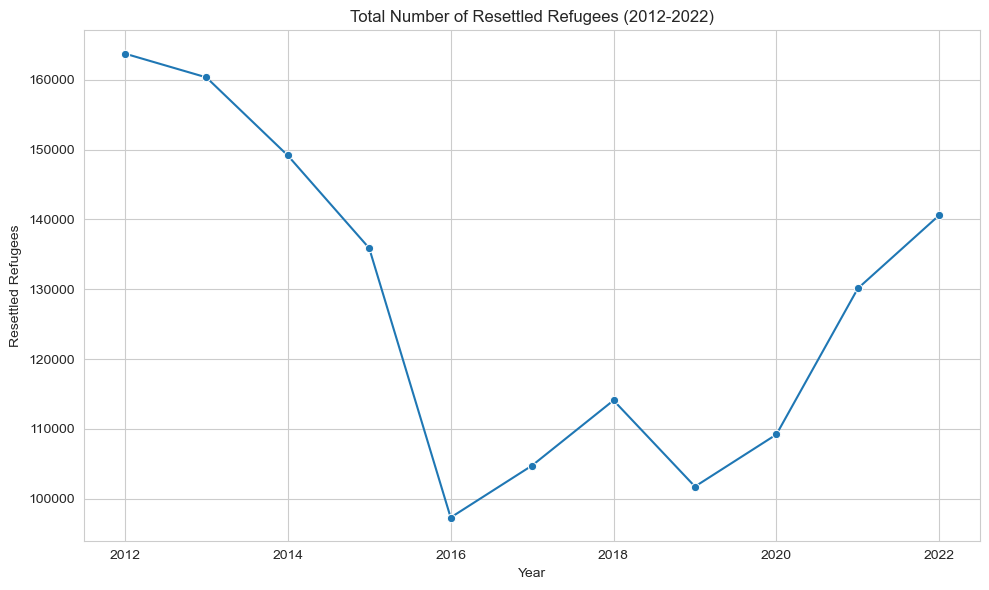

In [184]:
# Create a Seaborn line graph to visualize total number of resettled refugees in Canada per year
plt.figure(figsize=(10, 6))
sns.lineplot(data=total_refugees_yrly, x='Year', y='UNHCR-refugees', marker='o')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Resettled Refugees')
plt.title('Total Number of Resettled Refugees (2012-2022)')

# Display plot
plt.tight_layout()
plt.show()

### Question 3: Countries of Origin for Majority of Asylum Claims Made in Canada

In [182]:
# Create a DataFrame with the top countries and their Asylum-seekers sum, then sort values in desc order
top_asylum_seekers = data.groupby('Country-of-origin')['Asylum-seekers'].sum().reset_index(name='Asylum-seekers').sort_values(by='Asylum-seekers', ascending=False).head(10)

# Display the DataFrame with the top countries for Asylum-seekers
top_asylum_seekers.reset_index(drop=True).style.bar()

,Country-of-origin,Asylum-seekers
0,Unknown,56098
1,Nigeria,51620
2,India,48806
3,Mexico,47146
4,Haiti,40908
5,Colombia,30475
6,China,21526
7,Pakistan,19023
8,Türkiye,18166
9,Iran (Islamic Rep. of),15011


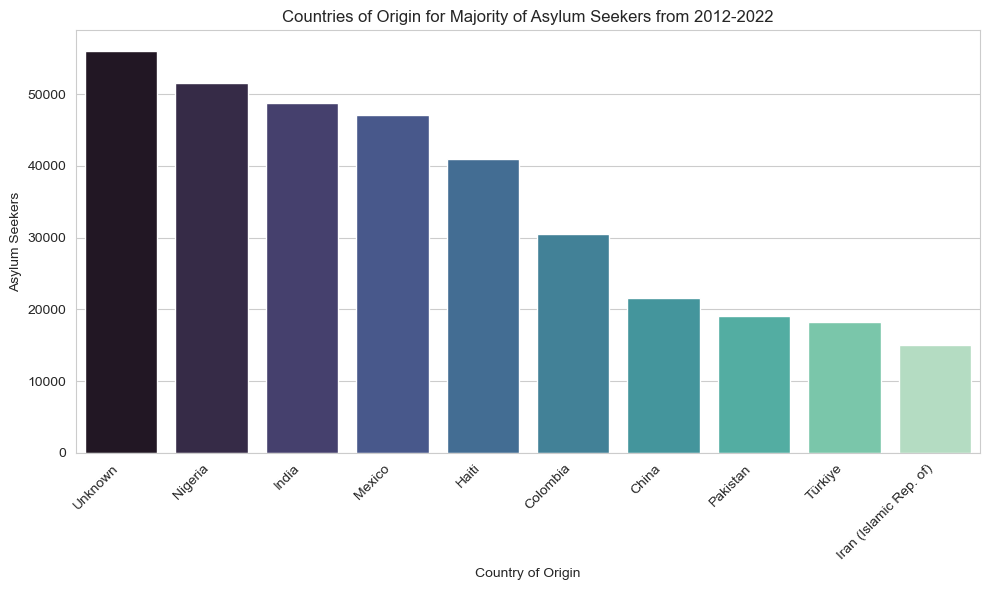

In [192]:
# Create Seaborn bar graph to visualize top 10 countries of origin for asylum seekers in Canada
plt.figure(figsize=(10,6))
sns.barplot(data=top_asylum_seekers, x='Country-of-origin', y='Asylum-seekers', palette='mako')

# Add labels and title
plt.xlabel('Country of Origin')
plt.ylabel('Asylum Seekers')
plt.title('Countries of Origin for Majority of Asylum Seekers from 2012-2022')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Display plot
plt.tight_layout()
plt.show()

### Question 4: Total Number of Asylum Claims Made in Canada Every Year

In [185]:
asylum_seekers_yrly = data.groupby('Year')['Asylum-seekers'].sum().reset_index(name='Asylum-seekers').sort_values(by='Year')

asylum_seekers_yrly.reset_index(drop=True)

,Year,Asylum-seekers
0,2012,32647
1,2013,22145
2,2014,16699
3,2015,19631
4,2016,23946
5,2017,51859
6,2018,78766
7,2019,97017
8,2020,85352
9,2021,63143


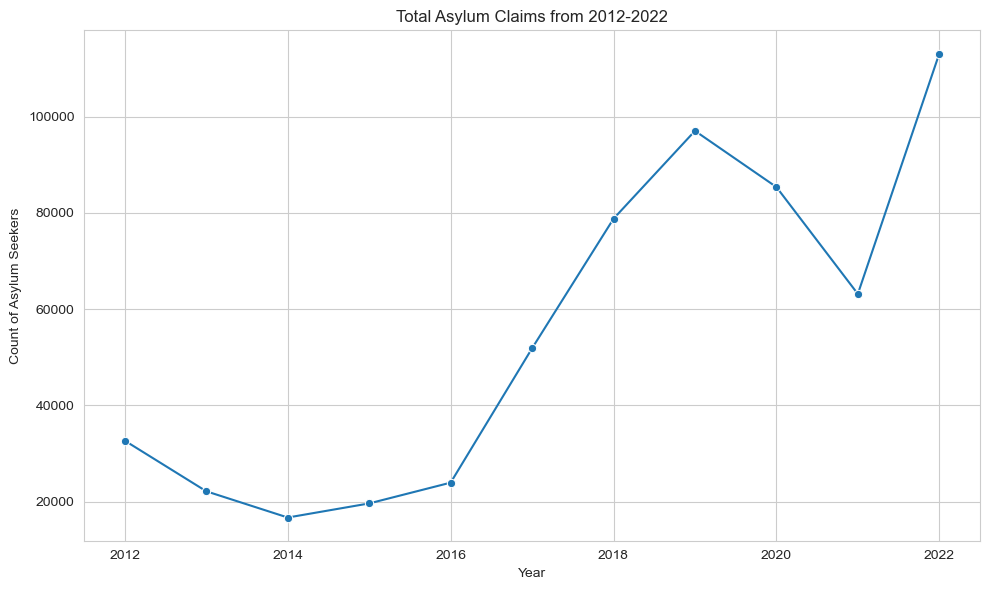

In [193]:
# Create a Seaborn line graph visualize total number of asylum being made in Canada every year
plt.figure(figsize=(10, 6))
sns.lineplot(data=asylum_seekers_yrly, x='Year', y='Asylum-seekers',marker='o')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Count of Asylum Seekers')
plt.title('Total Asylum Claims from 2012-2022')

# Display the plot
plt.tight_layout()
plt.show()

### Question 5: General Trends in Refugee and Asylum Statistics from 2012-2022

In [161]:
# Countries with highest overall count
top_countries = data.groupby('Country-of-origin')['total-count'].sum().reset_index(name='total-count').sort_values(by ='total-count', ascending=False).head(10)

top_countries.reset_index(drop=True).style.bar()

,Country-of-origin,total-count
0,Colombia,138891
1,China,120112
2,Nigeria,112174
3,Haiti,111864
4,Mexico,98218
5,Pakistan,93760
6,Ukraine,91182
7,India,81757
8,Sri Lanka,75102
9,Unknown,72545


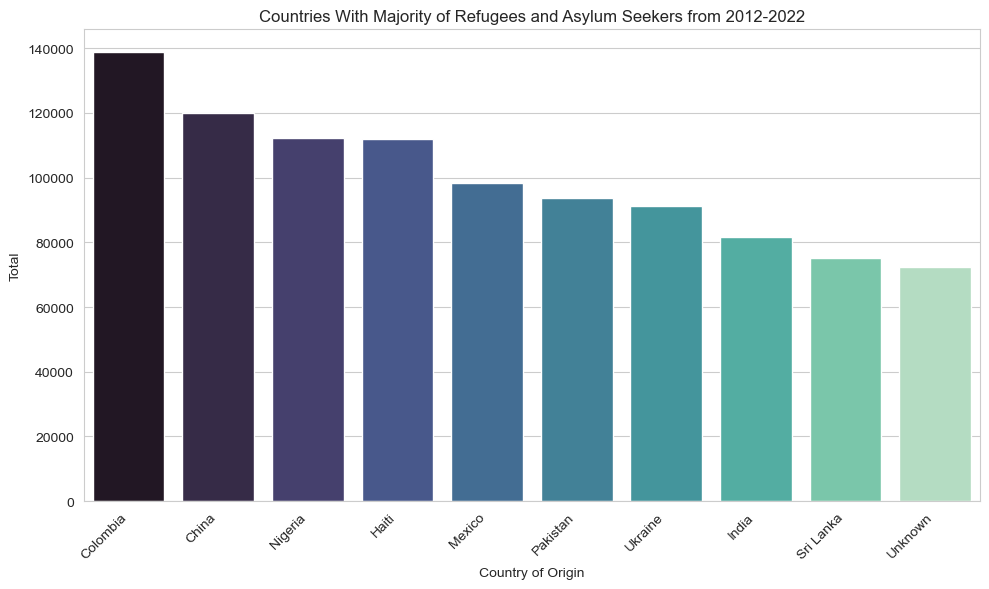

In [194]:
# Create bar graph to visualize which countries have the overall highest count from 2012-2022 of both refugees and asylum seekers
plt.figure(figsize=(10,6))
sns.barplot(data=top_countries, x='Country-of-origin', y='total-count', palette='mako')

# Create labels and title
plt.xlabel('Country of Origin')
plt.ylabel('Total')
plt.title('Countries With Majority of Refugees and Asylum Seekers from 2012-2022')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Display plot
plt.tight_layout()
plt.show()

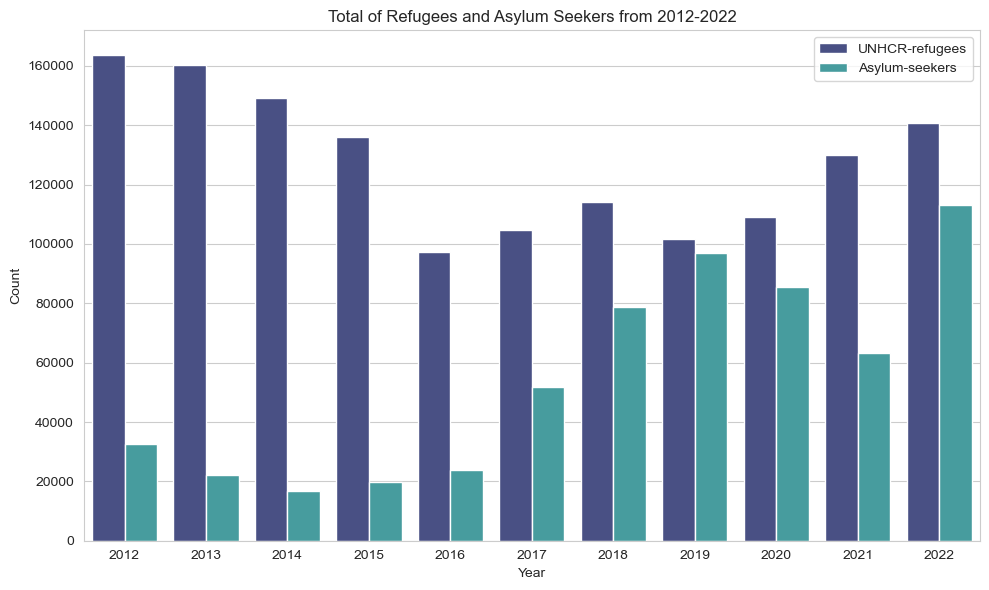

In [195]:
# General trends in number of refugees and asylum seekers

# Group the data by year and calculate the sum of each category for each year
yearly_counts = data.groupby('Year')[['UNHCR-refugees', 'Asylum-seekers']].sum().reset_index()

# Pivot the data to create a suitable format for bar plotting
melted_data = pd.melt(yearly_counts, id_vars=['Year'], var_name='Category', value_name='Count')

# Create a bar graph with unstacked, side-by-side bars using Matplotlib
plt.figure(figsize=(10, 6))
sns.barplot(data=melted_data, x='Year', y='Count', hue='Category', palette='mako')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Total of Refugees and Asylum Seekers from 2012-2022')

# Display the legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

## 2012- 2022 Canada Refugee Statistics EDA Results Summary

1. **Countries From Which Canada Has Admitted Highest Number of Refugees:**
    - Colombia (108,416)
    - China (98,586)
    - Ukraine (88,376)
    - Pakistan (74,737)
    - Haiti (70,956)
    - Sri Lanka (66,343)
    - Nigeria (60,554)
    - Mexico (51,072)
    - Türkiye (42,533)
    - Iran (40,881)
    
2. **Total Number of Resettled Refugees in Canada Per Year:**
    - 2012: 163,751
    - 2013: 160,347
    - 2014: 149,164
    - 2015: 135,890
    - 2016: 97,322
    - 2017: 104,768
    - 2018: 114,101
    - 2019: 101,757
    - 2020: 109,214
    - 2021: 130,125
    - 2022: 140,621
    
3. **Countries of Origin for Majority of Asylum Claims Made in Canada:**
    - Unknown (56,098)
    - Nigeria (51,620)
    - India (48,806)
    - Mexico (47,146)
    - Haiti (40,908)
    - Colombia (30,475)
    - China (21526)
    - Pakistan (19,023)
    - Türkiye (18,166)
    - Iran (15,011)
    
4. **Total Number of Asylum Claims Made in Canada Every Year:**
    - 2012: 32,647
    - 2013: 22,145
    - 2014: 16,699
    - 2015: 19,631
    - 2016: 23,946
    - 2017: 51,859
    - 2018: 78,766
    - 2019: 97,017
    - 2020: 85,352
    - 2021: 63,143
    - 2022: 113,066
    
5. **General Trends in Refugee and Asylum Statistics from 2012-2022:**
    - 2012 was the year where Canada admitted the highest number of refugees, followed by 2013, 2014 and 2022.
    - 2016 had the lowest number of resettled refugees
    - 2022 had the highest number of asylum claims made in Canada, followed by 2019 and 2020
    - 2014 had the lowest number of asylum claims, followed by 2015 and 2013